## Practical Application III: Comparing Classifiers

### Overview: 

In this practical application, goal is to compare the performance of the classifiers, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines. We will utilize a dataset related to marketing bank products over the telephone.

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

`The dataset collected is related to 17 marketing campaigns that occurred between May 2008 and November 2010.`

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [181]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [182]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```


In [183]:
df.shape

(41188, 21)

In [184]:
# examine for missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [185]:
# examine for duplicate values
df.duplicated().sum()

12

In [186]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

###  Business Objective :

The business goal is to build a model that can explain success of a contact, i.e. if the client subscribes the deposit. Such model can increase campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

`For feature engineering explore and visualize the data, independent variables and dependent variable, apply right encoding techniques to categorical variables and feature scaling and distribution.`

In [188]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [189]:
# number of unique values in each column
df.nunique().sort_values(ascending=True)

y                    2
contact              2
default              3
housing              3
loan                 3
poutcome             3
marital              4
day_of_week          5
education            8
previous             8
emp.var.rate        10
month               10
nr.employed         11
job                 12
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

In [190]:
# find count for dependent variable y
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

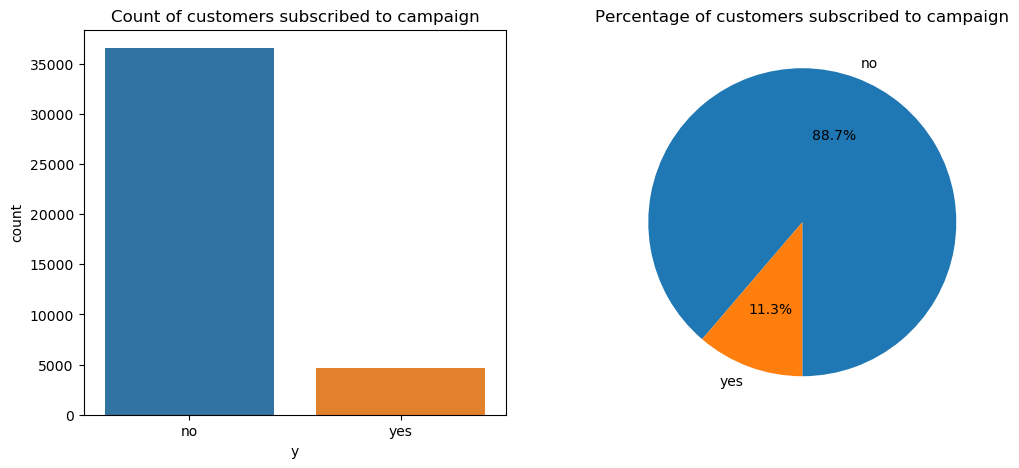

In [191]:
# find the distribution of customers that subscribed to campaign

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='y')
plt.title('Count of customers subscribed to campaign')
plt.subplot(1,2,2)
counts = df['y'].value_counts(sort= True)
labels = df['y'].value_counts(sort= True).index
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=270)
plt.title('Percentage of customers subscribed to campaign')
plt.show()

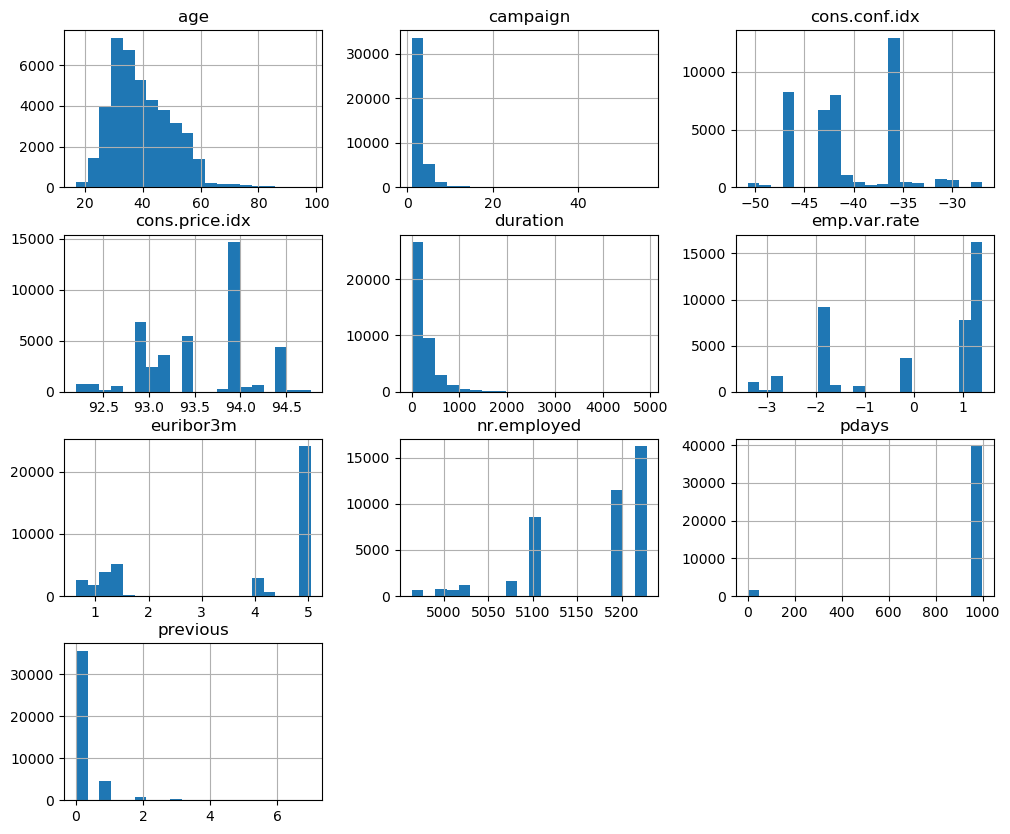

In [192]:
# find distribution of independent variables
#plt.style.use('seaborn-whitegrid')
df.hist(bins=20, figsize=(12,10))
plt.show()

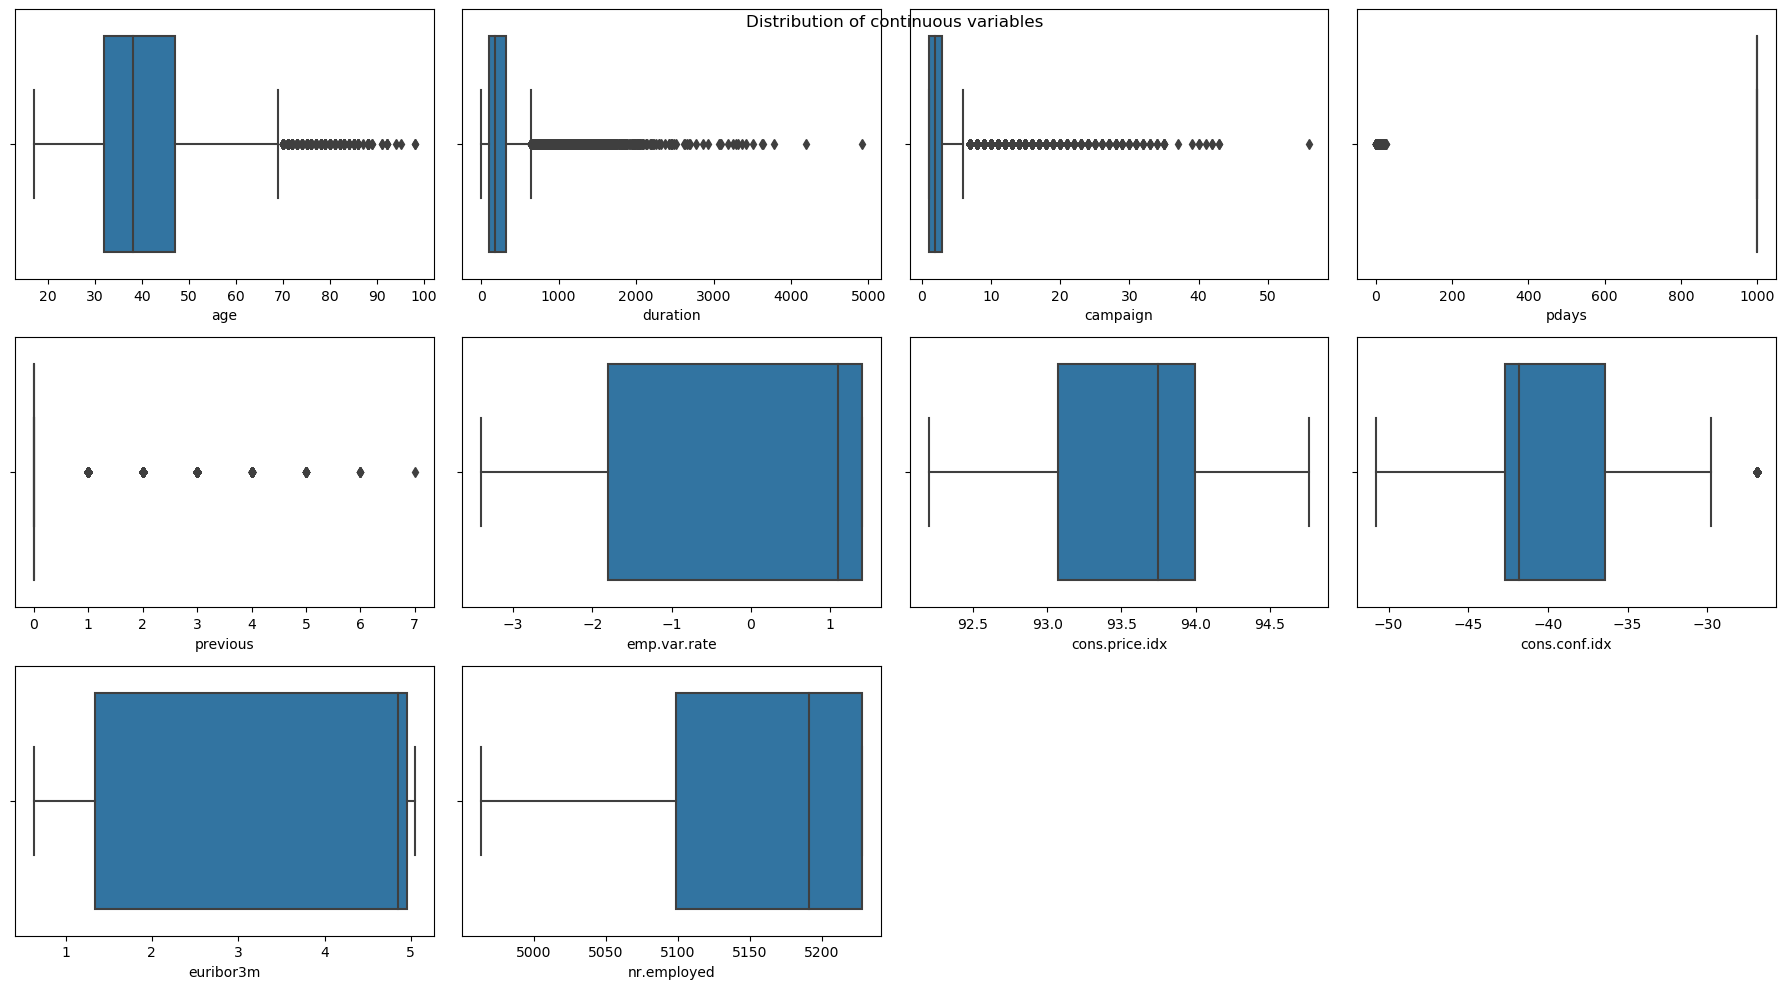

In [193]:
# Data distribution of continuous variables

plt.figure(figsize=(18,10))

for i, col in enumerate(df.drop(['y'], axis=1).select_dtypes(include=['number']).columns):
    ax = plt.subplot(3,4, i+1)
    sns.boxplot(data=df, x=col)
plt.suptitle('Distribution of continuous variables')
plt.tight_layout()

In [194]:
# map the dependent variable, yes to 1 and no to 0
df['y'] = df['y'].map({'yes':1, 'no':0})

In [195]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


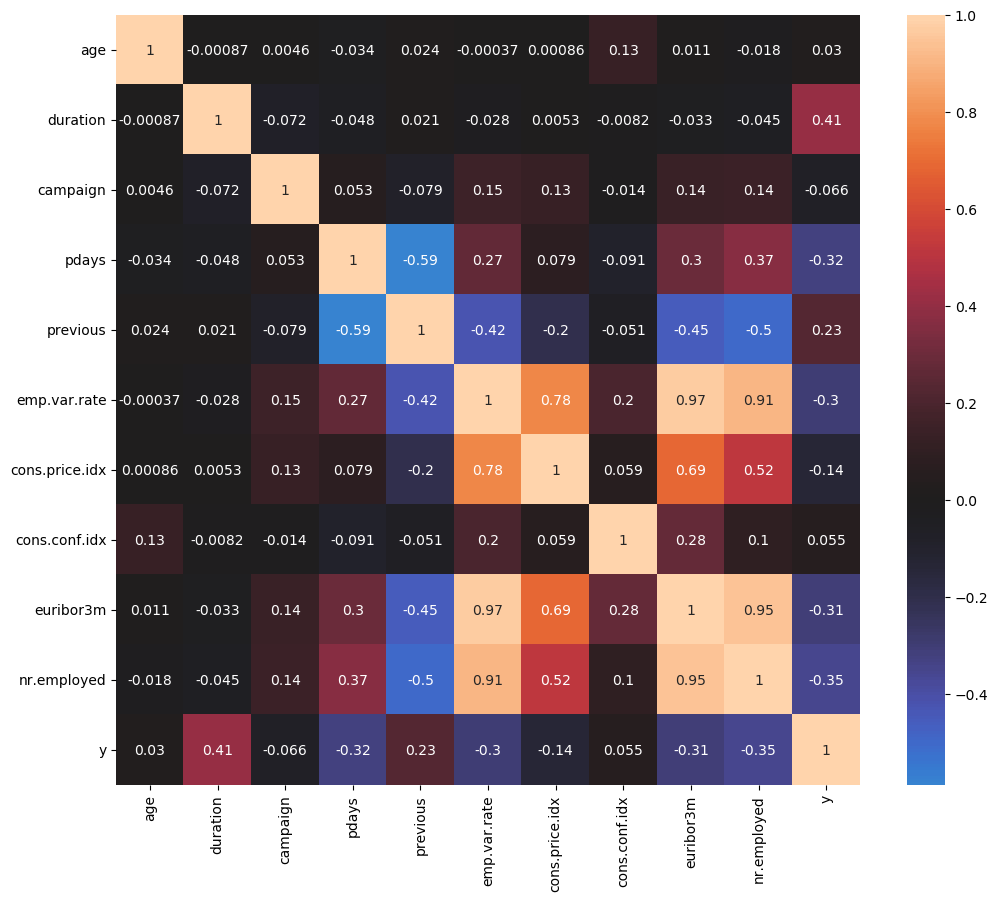

In [196]:
#Visualizing data correlation using heatmap.

plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr(), annot=True, center=0) #center=0 is the midpoint of the color map, the colors will diverge from this point in both positive and negative directions.
plt.show()

In [197]:
# Normalizing the data
df = pd.get_dummies(df, drop_first=True)
min_max_scaler = preprocessing.MinMaxScaler()

x = df[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m',
        'nr.employed']].values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)

# apply the normalizer on the dataframe
df[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] = pd.DataFrame(x_scaled)
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0


In [198]:
df.dropna(inplace=True)

In [199]:
df.shape

(41188, 54)

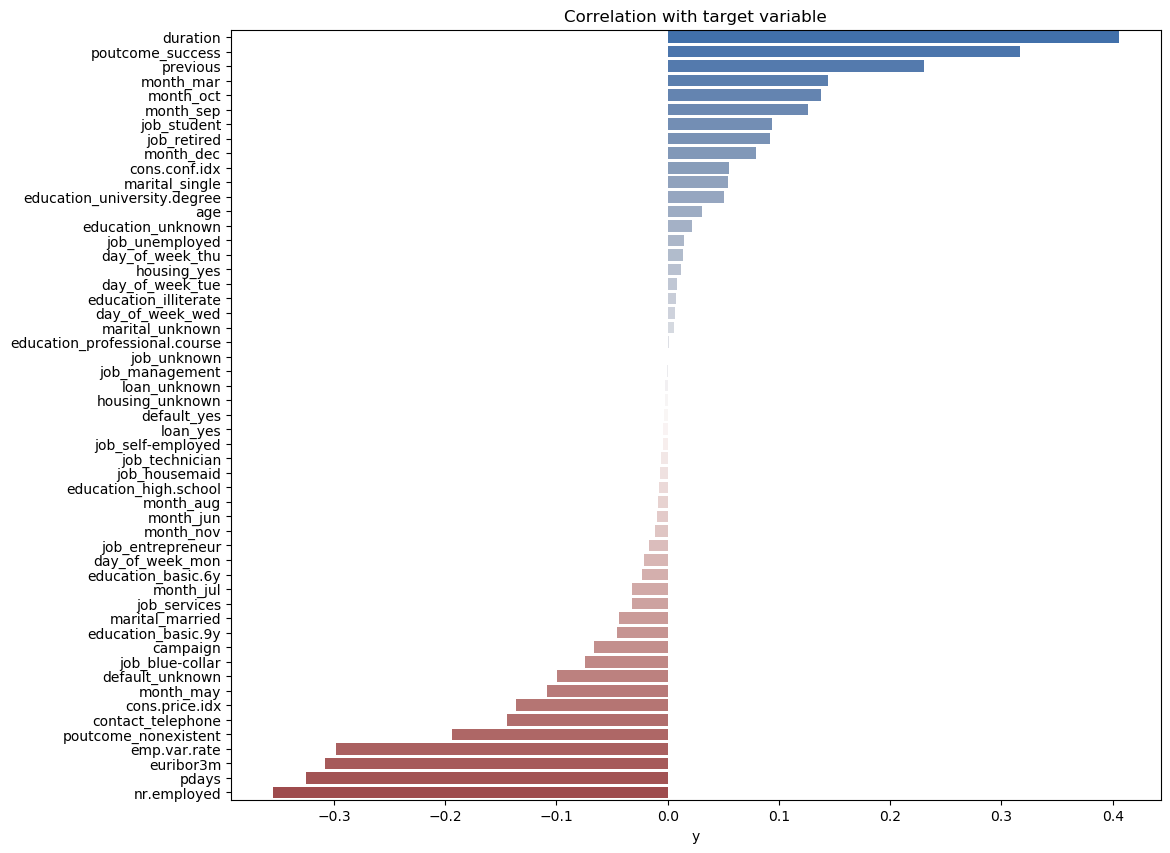

In [200]:
# coorelation to the target variable
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
target_corr = correlation_matrix['y'].drop('y')
target_corr = target_corr.sort_values(ascending=False)
sns.barplot(x=target_corr, y=target_corr.index, palette='vlag')
plt.title('Correlation with target variable')
plt.show()

In [201]:
X = df.drop(['y'], axis=1)
y = df['y']

In [202]:
# feature selection
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X.values, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.values)

In [203]:
# checkout the number of features selected
X_new.shape

(41188, 10)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [204]:
X_train,X_test,y_train,y_test = train_test_split(X_new, y, test_size=0.25, random_state=32)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [205]:
baseline = df['y'].value_counts(normalize= True)[0]
baseline

0.8873458288821987

In [206]:
print(f"Baseline Performance : {baseline*100:.2f}%")

Baseline Performance : 88.73%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data. 

In [231]:
start_time = time.time()

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time

### Problem 9: Score the Model

What is the accuracy of your model?

In [232]:
train_acc = accuracy_score(classifier.predict(X_train), y_train)*100
test_acc = accuracy_score(classifier.predict(X_test), y_test)*100
precision = precision_score(classifier.predict(X_test), y_test)*100
recall = recall_score(classifier.predict(X_test), y_test)*100
f1 = f1_score(classifier.predict(X_test), y_test)*100
print(f"Model Train Accuracy :  {train_acc:.2f}%")
print(f"Model Test Accuracy :  {test_acc:.2f}%")
print(f"Model Precision score :  {precision:.2f}%")
print(f"Model Recall score :  {recall:.2f}%")
print(f"Model f1 score :  {f1:.2f}%")

Model Train Accuracy :  90.97%
Model Test Accuracy :  90.39%
Model Precision score :  34.49%
Model Recall score :  67.53%
Model f1 score :  45.66%


In [233]:
def process_result(model_name, model, train_time):
    result=[]    
    train_acc = accuracy_score(model.predict(X_train), y_train)*100
    test_acc = accuracy_score(model.predict(X_test), y_test)*100
    precision = precision_score(model.predict(X_test), y_test)*100
    recall = recall_score(model.predict(X_test), y_test)*100
    f1 = f1_score(model.predict(X_test), y_test)*100    
    result.append(model_name)
    result.append(train_time) 
    result.append(train_acc)
    result.append(test_acc)
    result.append(precision)
    result.append(recall)
    result.append(f1)
    return result

In [234]:
model_comp = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy','Test Accuracy', 'Precision Score', 'Recall Score', 'F1 Score'])

In [235]:
result = process_result("LogisticRegression", logistic_classifier, training_time)
model_comp.loc[len(model_comp)] = result

In [236]:
model_comp

,Model,Train Time,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,LogisticRegression,0.151248,90.974718,90.385549,34.494196,67.532468,45.664105


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### KNeighborsClassifier Model

In [237]:
# build KNeighborsClassifier and compute accuracy and train time
start_time = time.time()
knn_classifier = KNeighborsClassifier().fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time
result = process_result("KNeighborsClassifier", knn_classifier, train_time)
model_comp.loc[len(model_comp)] = result
model_comp.iloc[-1]

Model              KNeighborsClassifier
Train Time                    0.0895553
Train Accuracy                  93.2407
Test Accuracy                   89.8708
Precision Score                 44.6103
Recall Score                    58.9266
F1 Score                        50.7787
Name: 1, dtype: object

#### DecisionTree Classifier Model

In [238]:
# Build DecisionTree Classifier and compute accuracy and train time
start_time = time.time()
dec_classifier = DecisionTreeClassifier().fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time
result = process_result("DecisionTreeClassifier", dec_classifier, train_time)
model_comp.loc[len(model_comp)] = result
model_comp.iloc[-1]

Model              DecisionTreeClassifier
Train Time                        0.11524
Train Accuracy                    99.9968
Test Accuracy                     88.9288
Precision Score                   52.1559
Recall Score                      52.7685
F1 Score                          52.4604
Name: 2, dtype: object

#### SVM Model

In [239]:
# Build SVM Classifier and compute accuracy and train time
start_time = time.time()
svc_classifier = SVC().fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time
result = process_result("SVC", svc_classifier, train_time)
model_comp.loc[len(model_comp)] = result
model_comp.iloc[-1]

Model                  SVC
Train Time         15.0135
Train Accuracy     90.2755
Test Accuracy      89.5309
Precision Score    19.9834
Recall Score       68.0791
F1 Score           30.8974
Name: 3, dtype: object

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### LogisticRegression with GridSearchCV and hyperparameters

In [240]:
# LogisticRegression with GridSearchCV and hyperparameters
start_time = time.time()
logistic_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 100],  # Add max_iter as a hyperparameter
    'penalty': ['l1', 'l2']
}

# Create a logistic regression model
logistic_reg = LogisticRegression(solver='liblinear')

logistic_reg_grid = GridSearchCV(logistic_reg, logistic_reg_params, cv=5, scoring='accuracy')
logistic_reg_grid.fit(X_train, y_train)
end_time = time.time()

train_time = end_time - start_time
result = process_result("GridSearch-LogisticRegression", logistic_reg_grid, train_time)
model_comp.loc[len(model_comp)] = result
model_comp.iloc[-1]

Model              GridSearch-LogisticRegression
Train Time                               33.6567
Train Accuracy                           91.0492
Test Accuracy                             90.337
Precision Score                          37.1476
Recall Score                             65.4015
F1 Score                                 47.3823
Name: 4, dtype: object

#### KNeighborsClassifier with GridSearchCV

In [241]:
# KNeighborsClassifier with GridSearchCV

start_time = time.time()
knn_pipe = Pipeline([('knn', KNeighborsClassifier())])
params = {'knn__n_neighbors': list(np.arange(1, 22,2))}
#knn_grid = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=list(np.arange(1, 22,2))), scoring='accuracy', cv=5)
knn_grid = GridSearchCV(estimator=knn_pipe, param_grid=params, scoring='accuracy', cv=5)
knn_grid.fit(X_train, y_train)
end_time = time.time()

train_time = end_time - start_time
result = process_result("GridSearch-KNeighborsClassifier", knn_grid, train_time)
model_comp.loc[len(model_comp)] = result
model_comp.iloc[-1]

Model              GridSearch-KNeighborsClassifier
Train Time                                 42.6254
Train Accuracy                             91.6448
Test Accuracy                               90.201
Precision Score                            38.6401
Recall Score                               63.4014
F1 Score                                   48.0165
Name: 5, dtype: object

#### DecisionTree Classifier with GridSearchCV and hyperparameters

In [243]:
# Build DecisionTree Classifier with gridsearch hyperparameters and compute accuracy and train time

params = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required in a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Maximum number of features to consider for a split
}
start_time = time.time()
dec_classifier = DecisionTreeClassifier()
decision_grid = GridSearchCV(dec_classifier, param_grid=params, scoring='accuracy', cv=5)
decision_grid.fit(X_train, y_train)
#dec_classifier = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
end_time = time.time()

train_time = end_time - start_time
result = process_result("GridSearch-DecisionTreeClassifier", decision_grid, train_time)
model_comp.loc[len(model_comp)] = result
model_comp.iloc[-1]

Model              GridSearch-DecisionTreeClassifier
Train Time                                   75.7955
Train Accuracy                               93.0012
Test Accuracy                                90.5312
Precision Score                              55.6385
Recall Score                                  60.396
F1 Score                                     57.9197
Name: 6, dtype: object

#### SVC Classifier with GridSearchCV and hyperparameters

In [244]:
start_time = time.time()
svc = SVC()
svc_params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1, 1, 10, 100]
}
svc_grid = GridSearchCV(svc, svc_params, cv=5, scoring='accuracy')
svc_grid.fit(X_train, y_train)
end_time = time.time()

train_time = end_time - start_time
result = process_result("GridSearch-SVC", svc_grid, train_time)
model_comp.loc[len(model_comp)] = result
model_comp.iloc[-1]

Model              GridSearch-SVC
Train Time                795.502
Train Accuracy            90.9618
Test Accuracy             89.9388
Precision Score           29.1045
Recall Score              65.9774
F1 Score                  40.3913
Name: 7, dtype: object

### Compare Results of Various Classifiers

In [245]:
model_comp

,Model,Train Time,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,LogisticRegression,0.151248,90.974718,90.385549,34.494196,67.532468,45.664105
1,KNeighborsClassifier,0.089555,93.240750,89.870836,44.610282,58.926616,50.778669
2,DecisionTreeClassifier,0.115240,99.996763,88.928814,52.155887,52.768456,52.460384
3,SVC,15.013504,90.275485,89.530931,19.983416,68.079096,30.897436
4,GridSearch-LogisticRegression,33.656703,91.049173,90.336991,37.147595,65.401460,47.382337
5,GridSearch-KNeighborsClassifier,42.625359,91.644816,90.201029,38.640133,63.401361,48.016486
6,GridSearch-DecisionTreeClassifier,75.795479,93.001198,90.531223,55.638474,60.396040,57.919724
7,GridSearch-SVC,795.502473,90.961769,89.938817,29.104478,65.977444,40.391254


### Evaluation

Now that we have built some models, we can compare and verify the performance of each model, result of cross validation for each model is added into model_comp for the final review. 

As a part of cross validation, each model is evaluated for training time, training accuracy, test accuracy, precision, recall and f1 score.

#### Summary :

Logistic Regression achieved highest accuracy with good recall and f1 score and relatively low precision, this makes one of the best choice.

KNeighborsClassifier has overall good accuracy, precision, recall and f1 score, model with gridserach hyperparamater yielded better results than the generic KNeighborsClassifier.

DecisionTreeClassifier achieved the hightest accuracy among all models with better precision, recall and f1 scores, model with gridserach hyperparamater yielded overall better results and making it best choice.

SVC model achieved the good accuracy but very low precision indicating higher chances of false positives. 